In [1]:
import os
import xarray as xr
import pandas as pd
from datetime import datetime, timedelta
from cfgrib.xarray_to_grib import to_grib
from matplotlib import pyplot as plt

In [2]:
%%time

# Carrega as variáveis de interesse em datasets individuais - variáveis 2d (tempo: ~32s)
# Lista das variáveis na tabela Grib 1 do ECMWF: https://codes.ecmwf.int/grib/param-db/?filter=grib1
#
# u10m: 10m_u_component_of_wind
# v10m: 10m_v_component_of_wind
# tp2m: 2m_temperature
# cp: convective_precipitation
# lsp: large_scale_precipitation
# msl: mean_sea_level_pressure
# sst: sea_surface_temperature
# sp: surface_pressure
# tp: total_precipitation
#
# Para baixar o arquivo Era520230201002023033112.sfc.grib, utilize o script get_era5_single_level_parameters.py (utilize o ambiente Era5)

#Vars = ['u10m', 'v10m', 'tp2m', 'cp', 'lsp', 'msl', 'sst', 'sp', 'tp']
Vars = ['cp', 'lsp', 'msl', 'sst', 'sp', 'tp']

ldf_sl = []

for var in Vars: 
    ds_var = xr.open_dataset('Era520230201002023033112.sfc.grib', engine='cfgrib', 
                             backend_kwargs={'indexpath': '', 'filter_by_keys': {'cfVarName': var}}, chunks={'time': 1}) 
    ldf_sl.append(ds_var)

CPU times: user 9.37 s, sys: 2.96 s, total: 12.3 s
Wall time: 31.8 s


In [3]:
ldf_sl

[<xarray.Dataset>
 Dimensions:     (time: 118, latitude: 721, longitude: 1440)
 Coordinates:
     number      int64 ...
   * time        (time) datetime64[ns] 2023-01-31T18:00:00 ... 2023-03-31T06:0...
     step        timedelta64[ns] ...
     surface     float64 ...
   * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
   * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
     valid_time  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
 Data variables:
     cp          (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
 Attributes:
     GRIB_edition:            1
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts
     history:                 2023-05-25T11:12 GRIB to C

In [4]:
%%time

# Faz o merge entre as variáveis 2d em um único dataset (tempo: ~75ms)

ds_sl = xr.merge(ldf_sl, compat='override')

CPU times: user 71.4 ms, sys: 949 µs, total: 72.4 ms
Wall time: 74.5 ms


In [5]:
ds_sl

<xarray.Dataset>
Dimensions:     (time: 236, latitude: 721, longitude: 1440)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-31T18:00:00 ... 2023-03-31T12:0...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 ...
    step        timedelta64[ns] ...
    surface     float64 ...
    valid_time  (time) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
Data variables:
    cp          (time, latitude, longitude) float32 dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
    lsp         (time, latitude, longitude) float32 dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
    msl         (time, latitude, longitude) float32 dask.array<chunksize=(3, 721, 1440), meta=np.ndarray>
    sst         (time, latitude, longitude) float32 dask.array<chunksize=(3, 721, 1440), meta=np.ndarray>
    sp          (time, latitude, longitude) float32 dask.array<chunksize=(3, 721, 1440), meta=np.ndarray>
    tp          (time, latitude, longitude) float32 dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-05-25T11:12 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
%%time

# Carrega as variáveis de interesse em datasets individuais - variáveis 3d (tempo: ~2min)
# Lista das variáveis na tabela Grib 1 do ECMWF: https://codes.ecmwf.int/grib/param-db/?filter=grib1
#
# u: u_component_of_wind
# v: v_component_of_wind
# t: temperature
# q: specific_humidity
# z: geopotential
#
# Para baixar o arquivo Era520230201002023033112.sfc.grib, utilize o script get_era5_pressure_levels_parameters.py (utilize o ambiente Era5)

Vars = ['u', 'v', 't', 'q', 'z']

ldf_pl = []

for var in Vars:
    ds_var = xr.open_dataset('Era520230201002023033112.atm.grib', engine='cfgrib', 
                             backend_kwargs={'indexpath': '', 'filter_by_keys': {'cfVarName': var}}, chunks={'time': 1})
    ldf_pl.append(ds_var)

CPU times: user 17.5 s, sys: 5.82 s, total: 23.4 s
Wall time: 1min 19s


In [7]:
ldf_pl

[<xarray.Dataset>
 Dimensions:        (time: 118, isobaricInhPa: 5, latitude: 721, longitude: 1440)
 Coordinates:
     number         int64 ...
   * time           (time) datetime64[ns] 2023-02-01 ... 2023-03-31T12:00:00
     step           timedelta64[ns] ...
   * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 500.0 250.0
   * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
   * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
     valid_time     (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
 Data variables:
     u              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(1, 5, 721, 1440), meta=np.ndarray>
 Attributes:
     GRIB_edition:            1
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre 

In [8]:
%%time

# Faz o merge entre as variáveis 3d em um único dataset (tempo: ~3.16ms)

ds_pl = xr.merge(ldf_pl, compat='override')

CPU times: user 5.53 ms, sys: 478 µs, total: 6 ms
Wall time: 4.89 ms


In [9]:
ds_pl

<xarray.Dataset>
Dimensions:        (time: 118, isobaricInhPa: 5, latitude: 721, longitude: 1440)
Coordinates:
    number         int64 ...
  * time           (time) datetime64[ns] 2023-02-01 ... 2023-03-31T12:00:00
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 500.0 250.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    u              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(1, 5, 721, 1440), meta=np.ndarray>
    v              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(1, 5, 721, 1440), meta=np.ndarray>
    t              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(1, 5, 721, 1440), meta=np.ndarray>
    q              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(1, 5, 721, 1440), meta=np.ndarray>
    z              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(1, 5, 721, 1440), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-05-25T11:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
%%time

# Faz o merge entre as variáveis 2d e 3d em um único dataset (tempo: ~62ms)

ds = xr.merge([ds_pl, ds_sl], compat='override')

CPU times: user 52.2 ms, sys: 0 ns, total: 52.2 ms
Wall time: 50.7 ms


In [11]:
ds

<xarray.Dataset>
Dimensions:        (time: 236, isobaricInhPa: 5, latitude: 721, longitude: 1440)
Coordinates:
  * time           (time) datetime64[ns] 2023-01-31T18:00:00 ... 2023-03-31T1...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 500.0 250.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number         int64 ...
    step           timedelta64[ns] ...
    valid_time     (time) datetime64[ns] dask.array<chunksize=(3,), meta=np.ndarray>
    surface        float64 ...
Data variables:
    u              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(3, 5, 721, 1440), meta=np.ndarray>
    v              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(3, 5, 721, 1440), meta=np.ndarray>
    t              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(3, 5, 721, 1440), meta=np.ndarray>
    q              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(3, 5, 721, 1440), meta=np.ndarray>
    z              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(3, 5, 721, 1440), meta=np.ndarray>
    cp             (time, latitude, longitude) float32 dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
    lsp            (time, latitude, longitude) float32 dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
    msl            (time, latitude, longitude) float32 dask.array<chunksize=(3, 721, 1440), meta=np.ndarray>
    sst            (time, latitude, longitude) float32 dask.array<chunksize=(3, 721, 1440), meta=np.ndarray>
    sp             (time, latitude, longitude) float32 dask.array<chunksize=(3, 721, 1440), meta=np.ndarray>
    tp             (time, latitude, longitude) float32 dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-05-25T11:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
%%time

# Faz o rechunck do dataset completo considerando cada tempo 1 chunck inteiro (tempo: 102ms)

ds_c = ds.chunk({'latitude': 'auto', 'longitude': 'auto', 'isobaricInhPa':  'auto', 'time': -1})

CPU times: user 116 ms, sys: 0 ns, total: 116 ms
Wall time: 115 ms


In [13]:
ds_c

<xarray.Dataset>
Dimensions:        (time: 236, isobaricInhPa: 5, latitude: 721, longitude: 1440)
Coordinates:
  * time           (time) datetime64[ns] 2023-01-31T18:00:00 ... 2023-03-31T1...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 500.0 250.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number         int64 ...
    step           timedelta64[ns] ...
    valid_time     (time) datetime64[ns] dask.array<chunksize=(236,), meta=np.ndarray>
    surface        float64 ...
Data variables:
    u              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    v              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    t              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    q              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    z              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    cp             (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    lsp            (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    msl            (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    sst            (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    sp             (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    tp             (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-05-25T11:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
%%time

# Escreve o dataset em um arquivo zarr em disco (tempo: ~4min)

ds_c.to_zarr('Era520230201002023033112.rea.zarr', mode='w')

/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/xarray/coding/times.py:618: RuntimeWarning: invalid value encountered in cast
  int_num = np.asarray(num, dtype=np.int64)


CPU times: user 2min, sys: 1min 46s, total: 3min 46s
Wall time: 4min 20s


In [15]:
#%%time

# Escreve o dataset em um arquivo netcdf em disco (tempo: ~14min)
# Nota: apenas para efeito de comparação com a escrita do arquivo Zarr

#ds.to_netcdf('Era520230201002023033112.rea.nc')

In [16]:
%%time

# Carrega o arquivo zarr (tempo: ~223ms)

dsz = xr.open_zarr('Era520230201002023033112.rea.zarr')

/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


CPU times: user 18.4 ms, sys: 15.7 ms, total: 34.1 ms
Wall time: 903 ms


In [17]:
dsz

<xarray.Dataset>
Dimensions:        (time: 236, latitude: 721, longitude: 1440, isobaricInhPa: 5)
Coordinates:
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 500.0 250.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number         int64 ...
    step           timedelta64[ns] ...
    surface        float64 ...
  * time           (time) datetime64[ns] 2023-01-31T18:00:00 ... 2023-03-31T1...
    valid_time     (time) datetime64[ns] dask.array<chunksize=(236,), meta=np.ndarray>
Data variables:
    cp             (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    lsp            (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    msl            (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    q              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    sp             (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    sst            (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    t              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    tp             (time, latitude, longitude) float32 dask.array<chunksize=(236, 266, 533), meta=np.ndarray>
    u              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    v              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
    z              (time, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(236, 1, 265, 534), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2023-05-25T11:13 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [21]:
%%time

# Escreve cada tempo (apenas 00 e 12Z) do dataset em um arquivo separado com o nome Era5YYYYMMHHDDYYYYMMDDHH.icn.nc (tempo: ~5min)
# Nota: esta parte é feita para verificar a consistência dos arquivos Grib escritos utilizando a biblioteca cfgrib

times = ds.time.values

for time in times:
    sds = ds.sel(time=time)
    datefmt = pd.to_datetime(str(time)).strftime('%Y%m%d%H')
    if (datefmt[8:10] == '00') or (datefmt[8:10] == '12'):
        fname = 'Era5' + str(datefmt) + str(datefmt) + '.icn.nc'
        print(fname)
        sds.to_netcdf(os.path.join('./netcdf',fname))

Era520230201002023020100.icn.nc
Era520230201122023020112.icn.nc
Era520230202002023020200.icn.nc
Era520230202122023020212.icn.nc
Era520230203002023020300.icn.nc
Era520230203122023020312.icn.nc
Era520230204002023020400.icn.nc
Era520230204122023020412.icn.nc
Era520230205002023020500.icn.nc
Era520230205122023020512.icn.nc
Era520230206002023020600.icn.nc
Era520230206122023020612.icn.nc
Era520230207002023020700.icn.nc
Era520230207122023020712.icn.nc
Era520230208002023020800.icn.nc
Era520230208122023020812.icn.nc
Era520230209002023020900.icn.nc
Era520230209122023020912.icn.nc
Era520230210002023021000.icn.nc
Era520230210122023021012.icn.nc
Era520230211002023021100.icn.nc
Era520230211122023021112.icn.nc
Era520230212002023021200.icn.nc
Era520230212122023021212.icn.nc
Era520230213002023021300.icn.nc
Era520230213122023021312.icn.nc
Era520230214002023021400.icn.nc
Era520230214122023021412.icn.nc
Era520230215002023021500.icn.nc
Era520230215122023021512.icn.nc
Era520230216002023021600.icn.nc
Era52023

In [20]:
%%time

# Converte cada arquivo netcdf em grib (tempo: ~9min)
# Nota: os arquivos ctl e gmp (índice) são gerados posteriormente com os comandos:
# $ cdo gradsdes arquivo.grib 
# ou 
# $ grads2ctl.pl arquivo.grib > arquivo.ctl 
# A utilização do script grads2ctl.pl é preferencial, pois escreve corretamente os nomes das variáveis (https://www.cpc.ncep.noaa.gov/products/wesley/grib2ctl.html)

# Equivalência entre as variáveis de interessse das tabelas Grib do ECMWF e do CPTEC (códigos das variáveis encontrados em https://codes.ecmwf.int/grib/param-db/)
# CDO       grib2ctl.pl    Tabela ECMWF    Nome da variável            Tabela CPTEC    Nome da variável
# var131    Uprs           u   [m/s]       u component of wind         uvel [m/s]      zonal wind
# var132    Vprs           v   [m/s]       v component of wind         vvel [m/s]      meridional wind
# var130    Tprs           t   [K]         temperature                 temp [K]        absolute temperature
# var133    Qprs           q   [kg/kg]     specific humidity           umes [kg/kg]    specific humidity
# var129    Zprs           z   [m2/s2]     geopotential                zgeo [gpm]      geopotential height
# var151    MSLsfc         msl [Pa]        mean sea level pressure     psnm [hPa]      sea level pressure
# var34     SSTKsfc        sst [K]         sea surface_pressure        ---- -----      ------------------
# var134    SPsfc          sp  [Pa]        surface_pressure            pslc [hPa]      surface pressure
# Notas: 
# Para converter o geopotencial para altura geopotencial, basta dividir o geopotencial pela acelaração da gravidade
# Para converter a pressão em Pa para hPa, basta dividir por 100
# A variável sst não está sendo considerada na utilização dos arquivos do Era5 com o SCANTEC, por isso não está documentada

times = ds.time.values

for time in times:
    sds = ds.sel(time=time)
    datefmt = pd.to_datetime(str(time)).strftime('%Y%m%d%H')
    if (datefmt[8:10] == '00') or (datefmt[8:10] == '12'):
        fname = 'Era5' + str(datefmt) + str(datefmt) + '.icn.grib'
        print(fname)
        to_grib(sds, os.path.join('./grib',fname))

Era520230201002023020100.icn.grib
Era520230201122023020112.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230202002023020200.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230202122023020212.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230203002023020300.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230203122023020312.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230204002023020400.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230204122023020412.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230205002023020500.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230205122023020512.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230206002023020600.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230206122023020612.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230207002023020700.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230207122023020712.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230208002023020800.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230208122023020812.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230209002023020900.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230209122023020912.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230210002023021000.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230210122023021012.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230211002023021100.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230211122023021112.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230212002023021200.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230212122023021212.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230213002023021300.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230213122023021312.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230214002023021400.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230214122023021412.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230215002023021500.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230215122023021512.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230216002023021600.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230216122023021612.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230217002023021700.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230217122023021712.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230218002023021800.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230218122023021812.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230219002023021900.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230219122023021912.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230220002023022000.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230220122023022012.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230221002023022100.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230221122023022112.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230222002023022200.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230222122023022212.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230223002023022300.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230223122023022312.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230224002023022400.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230224122023022412.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230225002023022500.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230225122023022512.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230226002023022600.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230226122023022612.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230227002023022700.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230227122023022712.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230228002023022800.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230228122023022812.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230301002023030100.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230301122023030112.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230302002023030200.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230302122023030212.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230303002023030300.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230303122023030312.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230304002023030400.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230304122023030412.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230305002023030500.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230305122023030512.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230306002023030600.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230306122023030612.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230307002023030700.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230307122023030712.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230308002023030800.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230308122023030812.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230309002023030900.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230309122023030912.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230310002023031000.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230310122023031012.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230311002023031100.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230311122023031112.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230312002023031200.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230312122023031212.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230313002023031300.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230313122023031312.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230314002023031400.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230314122023031412.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230315002023031500.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230315122023031512.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230316002023031600.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230316122023031612.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230317002023031700.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230317122023031712.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230318002023031800.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230318122023031812.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230319002023031900.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230319122023031912.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230320002023032000.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230320122023032012.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230321002023032100.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230321122023032112.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230322002023032200.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230322122023032212.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230323002023032300.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230323122023032312.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230324002023032400.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230324122023032412.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230325002023032500.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230325122023032512.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230326002023032600.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230326122023032612.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230327002023032700.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230327122023032712.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230328002023032800.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230328122023032812.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230329002023032900.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230329122023032912.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230330002023033000.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230330122023033012.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230331002023033100.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


Era520230331122023033112.icn.grib


/home/carlos/anaconda3/envs/Era5.tmp/lib/python3.11/site-packages/cfgrib/xarray_to_grib.py:261: FutureWarning: GRIB write support is experimental, DO NOT RELY ON IT!
  warnings.warn("GRIB write support is experimental, DO NOT RELY ON IT!", FutureWarning)


CPU times: user 5min 26s, sys: 40.8 s, total: 6min 7s
Wall time: 8min 42s


In [22]:
%%time

# Compara a consistência dos arquivos grib e netcdf escritos em disco (tempo: ~3ms)
# Nota: o arquivo grib ficou com 8 variáveis e o arquivo netcdf ficou com 11 variáveis (por que?!)

ds_grib = xr.open_dataset('./grib/Era520230329002023032900.icn.grib', engine='cfgrib')
ds_netcdf = xr.open_dataset('./netcdf/Era520230329002023032900.icn.nc', engine='netcdf4')

CPU times: user 2.62 s, sys: 54.7 ms, total: 2.68 s
Wall time: 7.06 s


In [23]:
ds_grib

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 5, latitude: 721, longitude: 1440)
Coordinates:
    number         int64 ...
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 500.0 250.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
    surface        float64 ...
Data variables:
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    msl            (latitude, longitude) float32 ...
    sst            (latitude, longitude) float32 ...
    sp             (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-05-25T11:33 GRIB to CDM+CF via cfgrib-0.9.1...

In [24]:
ds_netcdf

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 5, latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 500.0 250.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number         int64 ...
    step           timedelta64[ns] ...
    valid_time     datetime64[ns] ...
    surface        float64 ...
Data variables:
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    cp             (latitude, longitude) float32 ...
    lsp            (latitude, longitude) float32 ...
    msl            (latitude, longitude) float32 ...
    sst            (latitude, longitude) float32 ...
    sp             (latitude, longitude) float32 ...
    tp             (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-05-25T11:13 GRIB to CDM+CF via cfgrib-0.9.1...

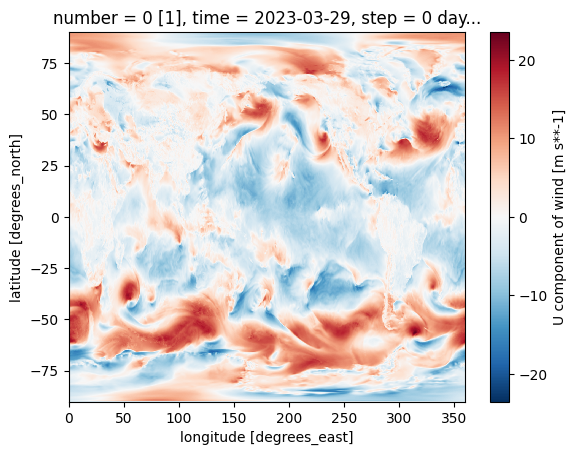

In [25]:
ds_grib.u.isel(isobaricInhPa=0).plot()

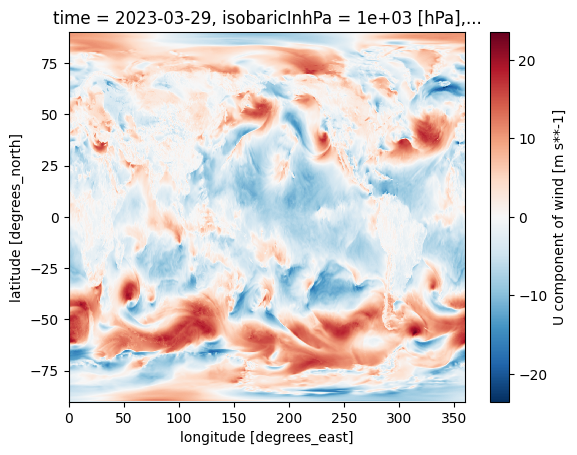

In [26]:
ds_netcdf.u.isel(isobaricInhPa=0).plot()

In [27]:
for i in (ds_grib.data_vars):
    print(i)

u
v
t
q
z
msl
sst
sp


/tmp/ipykernel_35710/2969166399.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


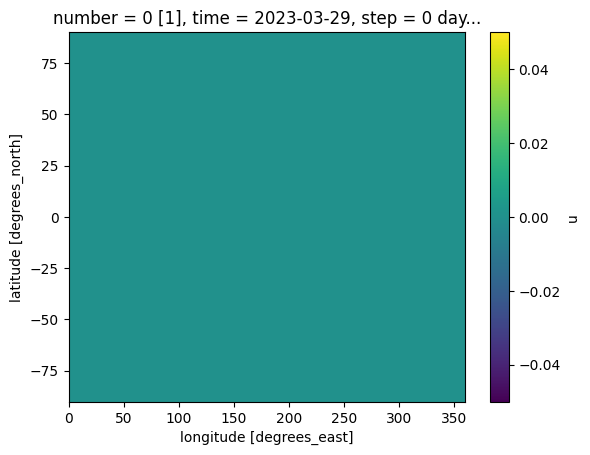

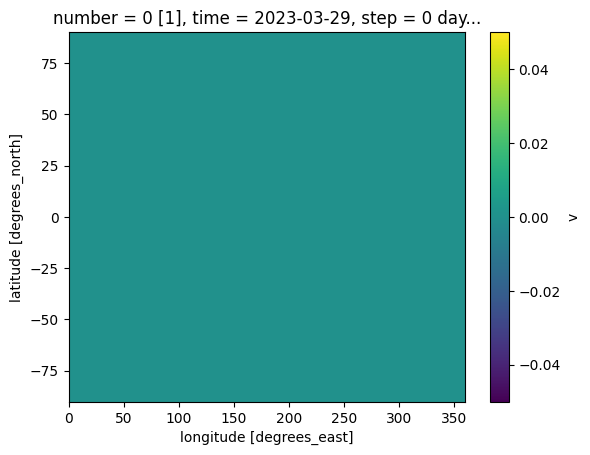

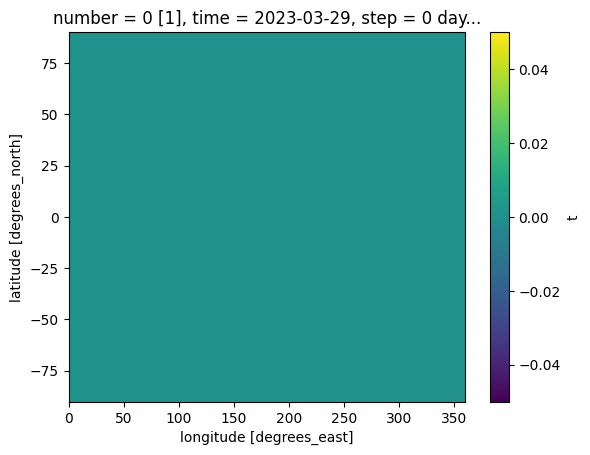

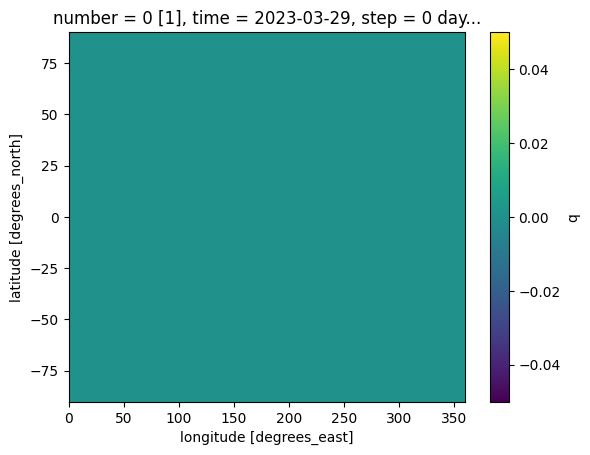

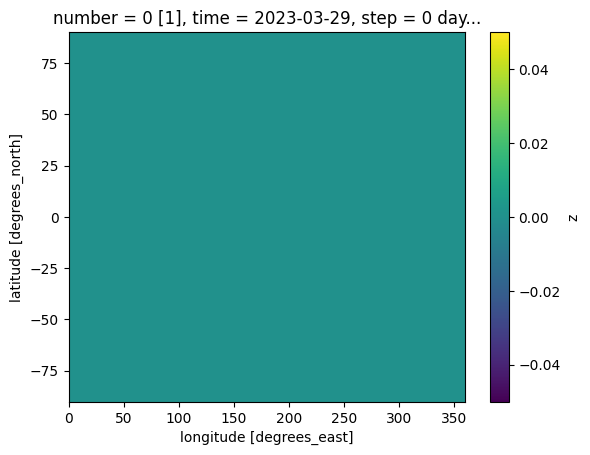

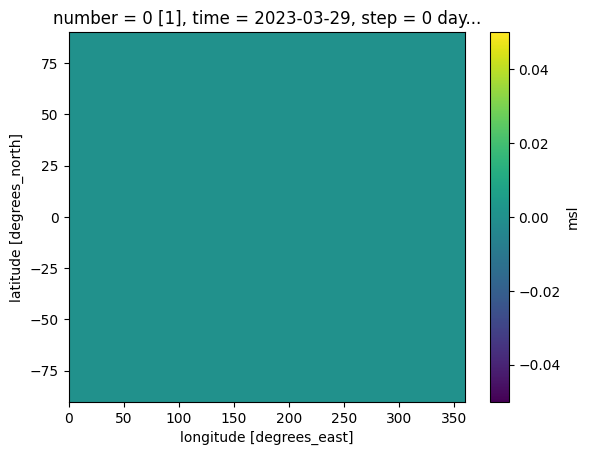

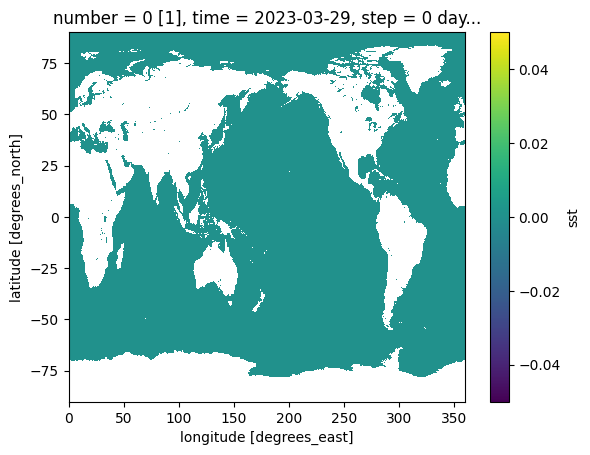

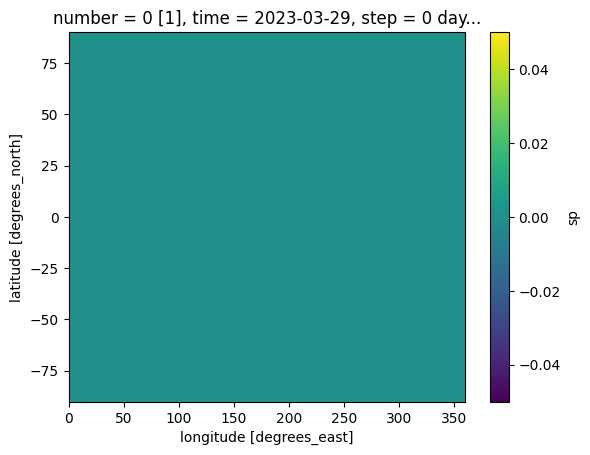

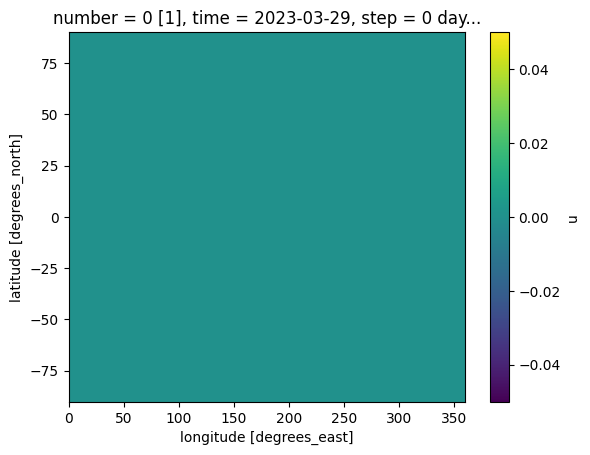

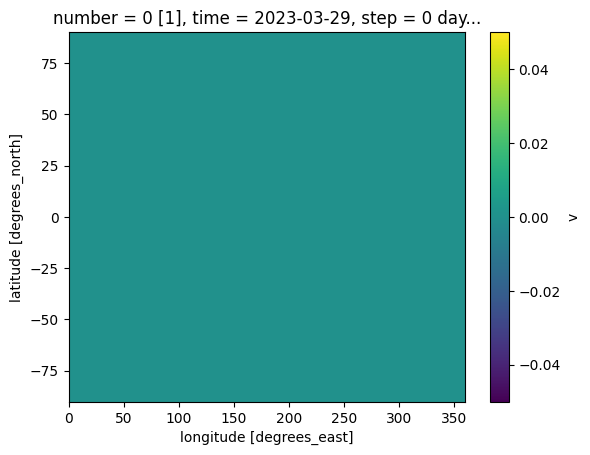

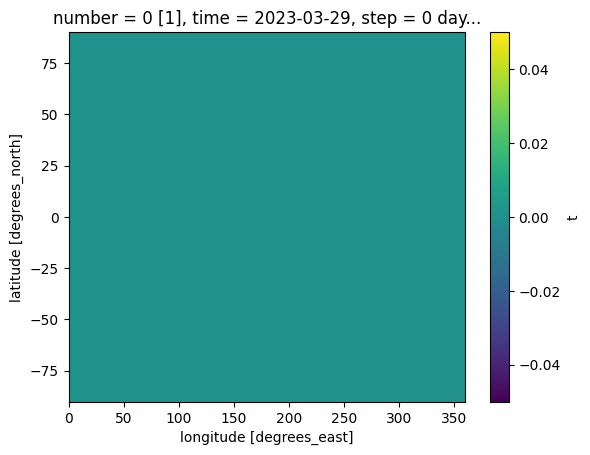

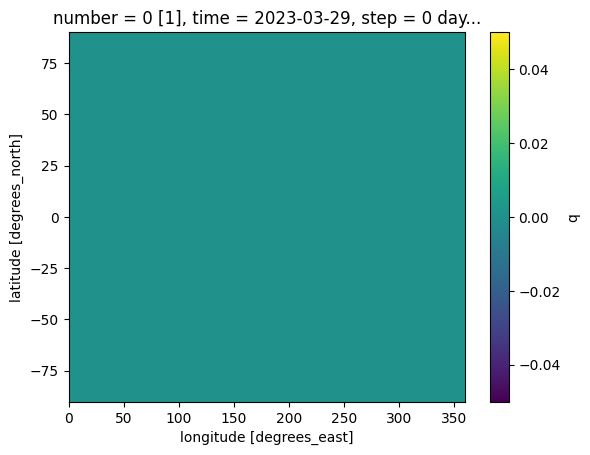

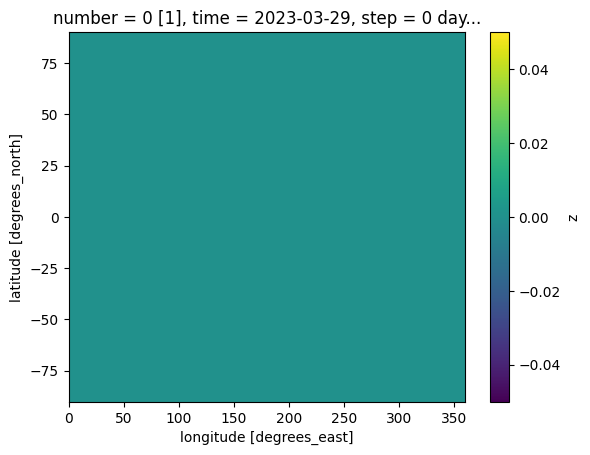

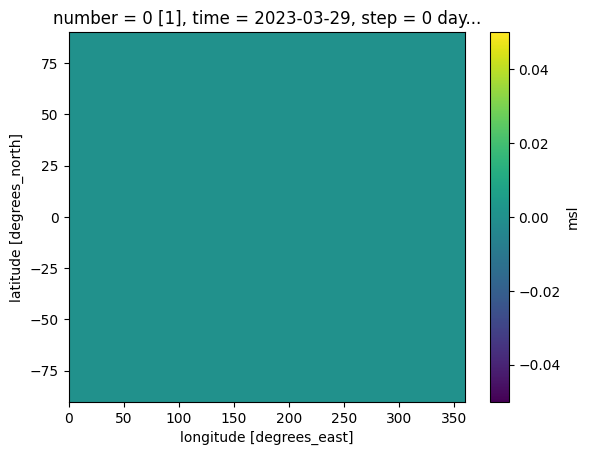

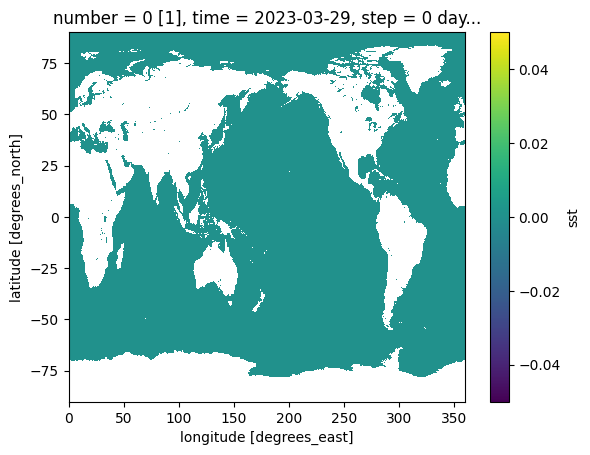

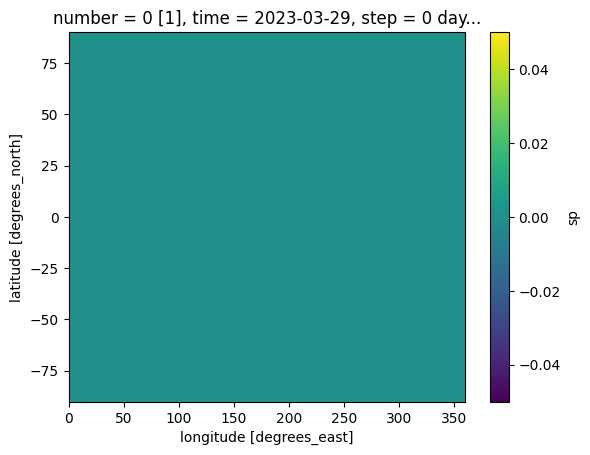

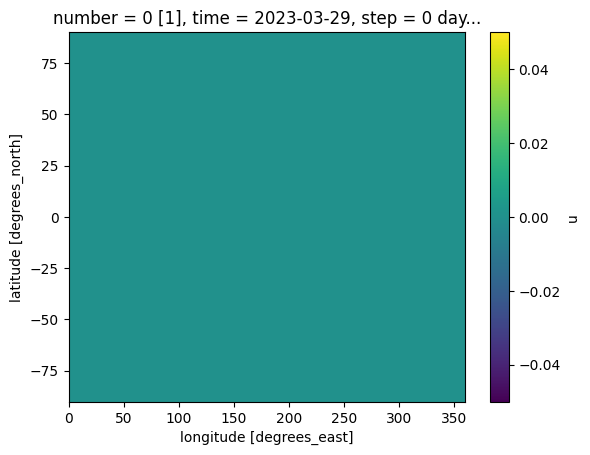

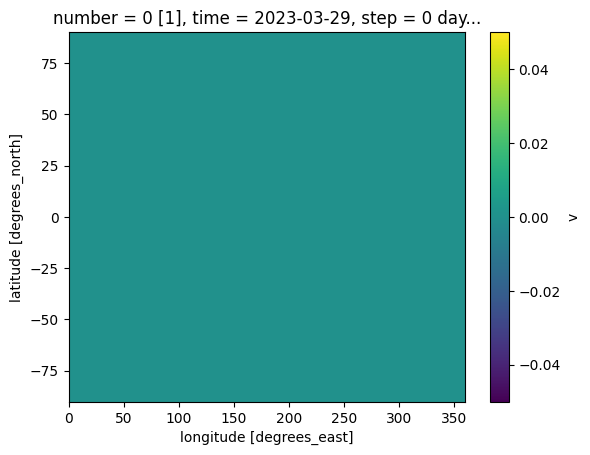

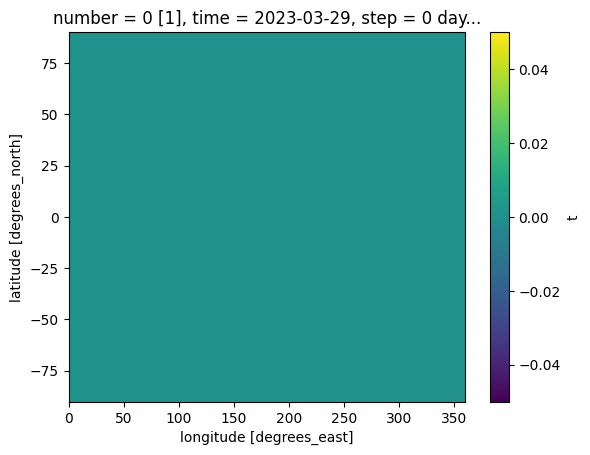

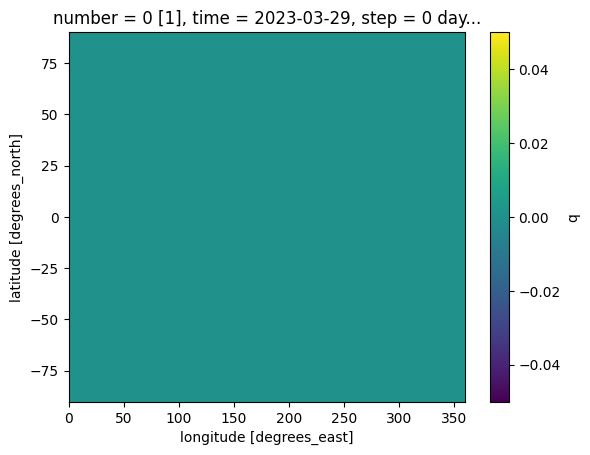

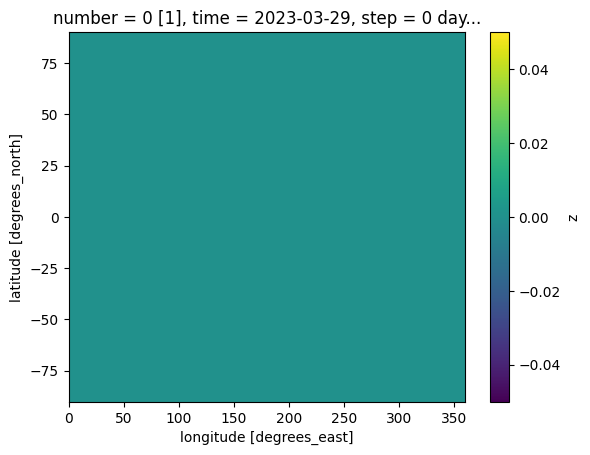

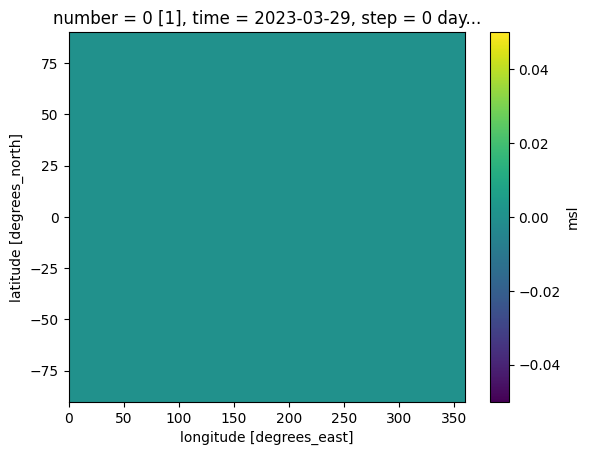

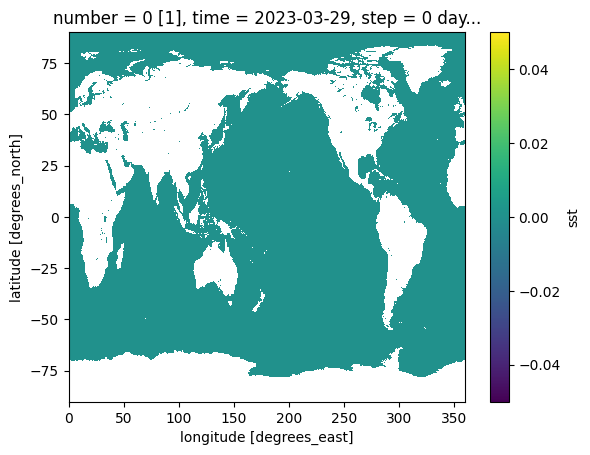

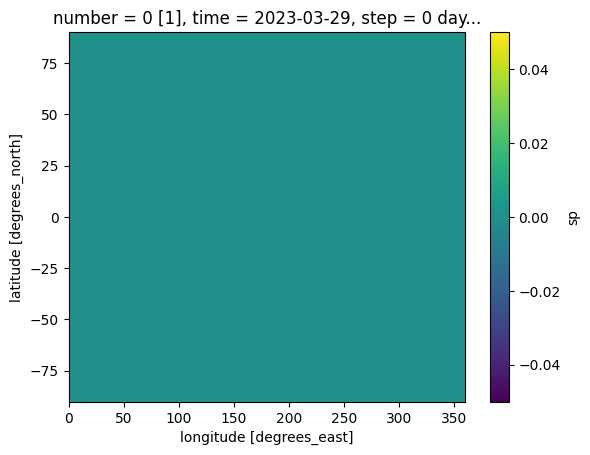

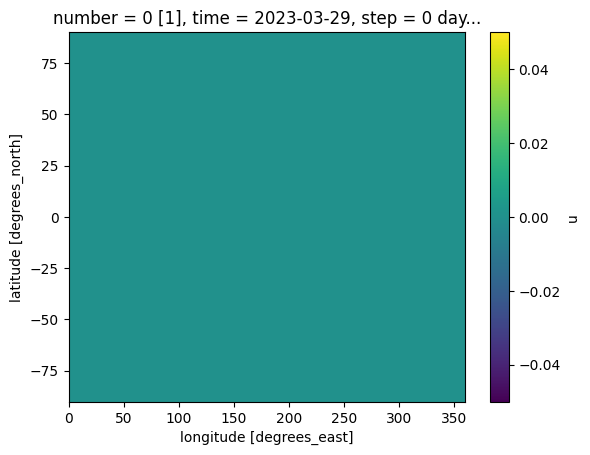

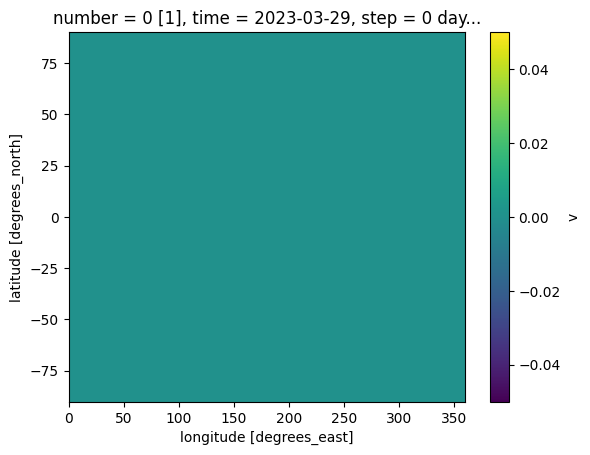

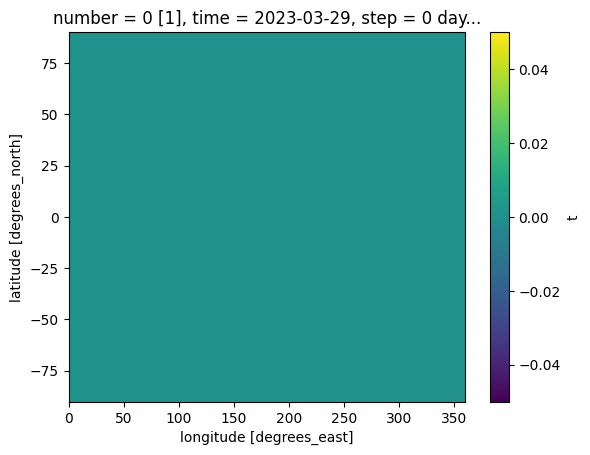

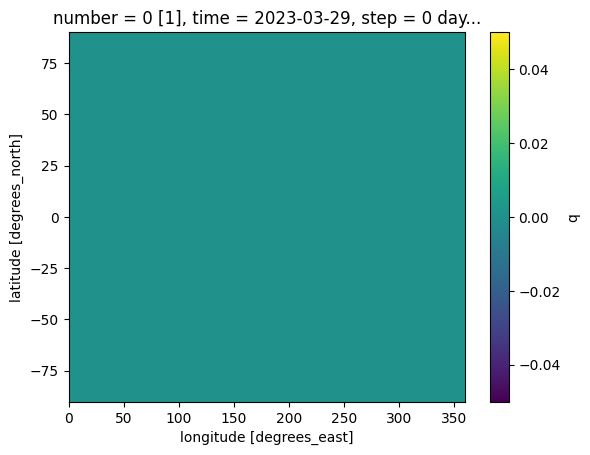

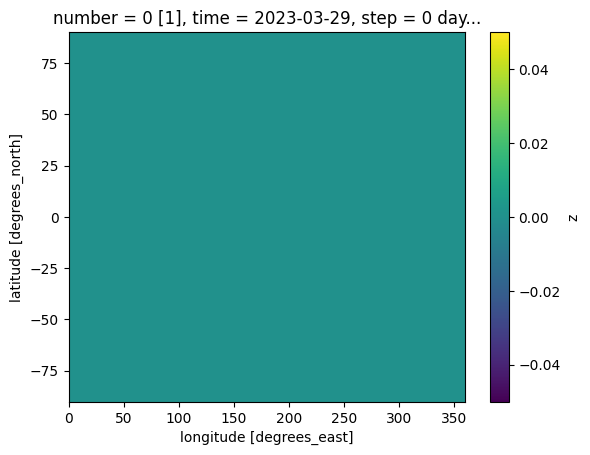

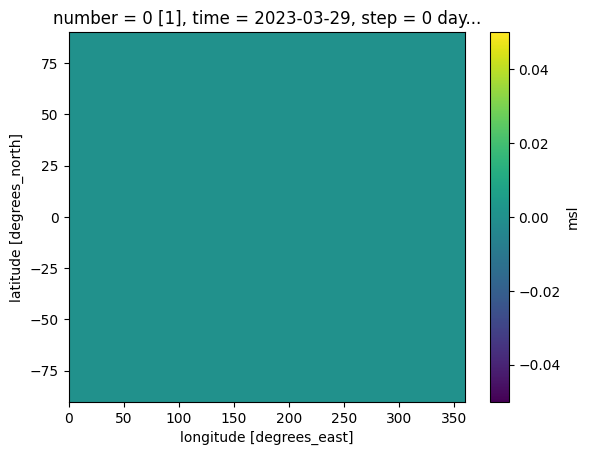

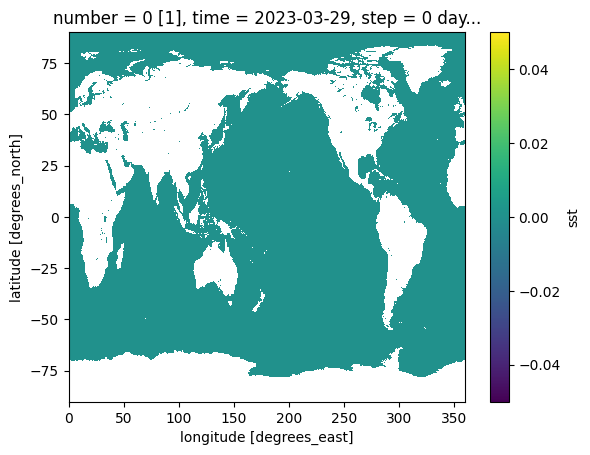

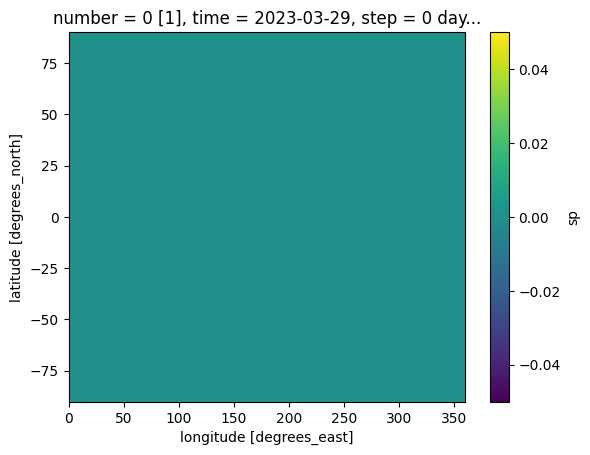

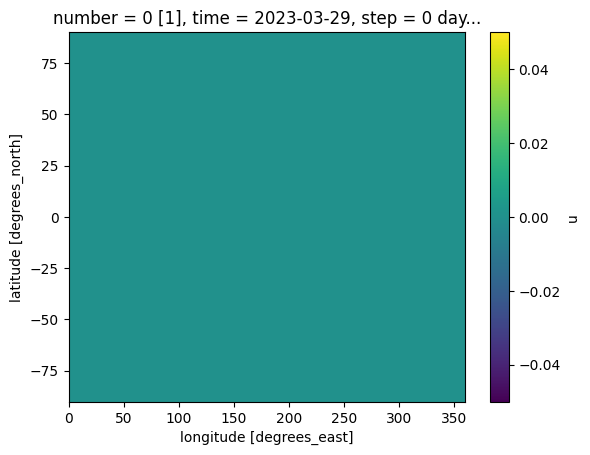

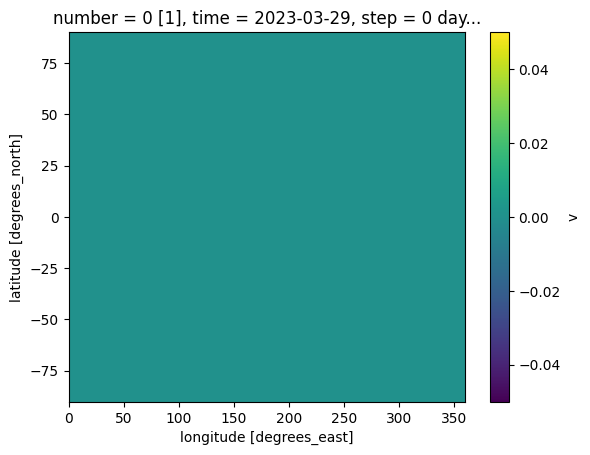

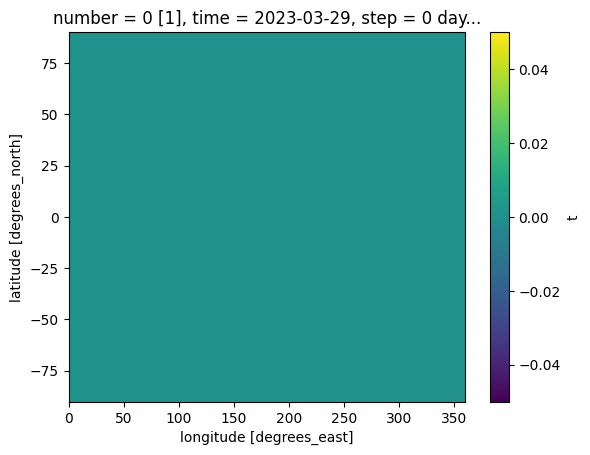

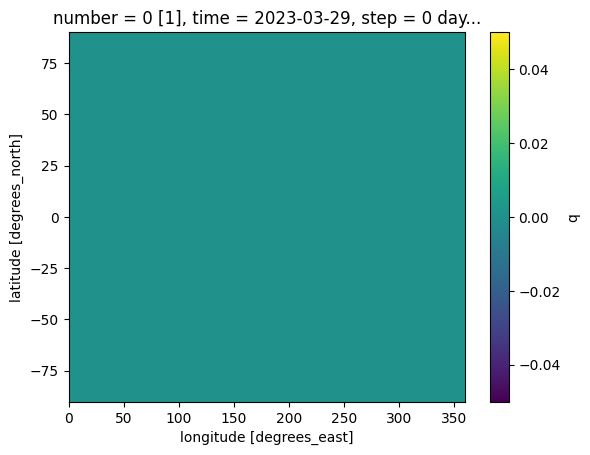

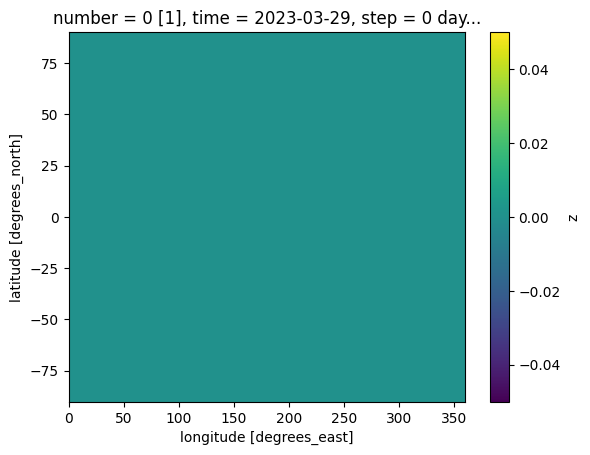

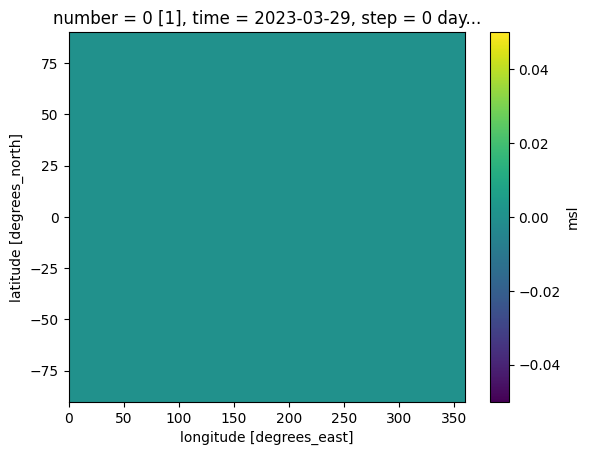

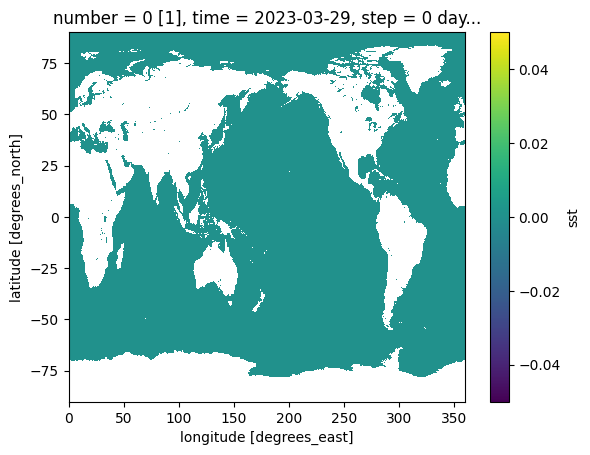

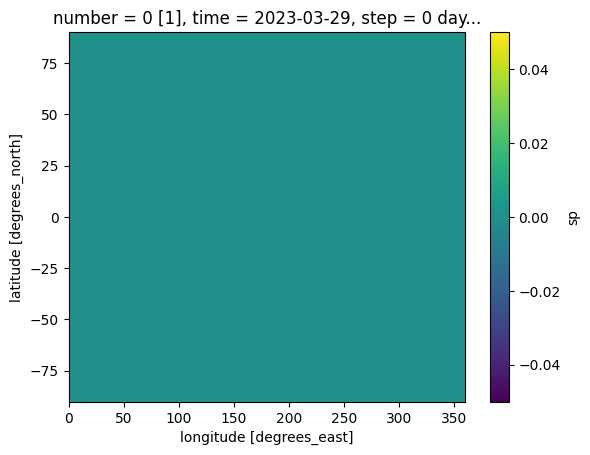

In [28]:
%matplotlib inline

# Aqui espera-se que a diferença entre os campos considerados seja sempre zero, o que demonstra a consistência entre os arquivos 

for lev in range(5):
    for var in ds_grib.data_vars:
        plt.figure()
        if (var == 'msl') or (var == 'sst') or (var == 'sp'):
            ax = (ds_grib[var] - ds_netcdf[var]).plot()
        else:            
            ax = (ds_grib[var].isel(isobaricInhPa=lev) - ds_netcdf[var].isel(isobaricInhPa=lev)).plot()